In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

In [2]:
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    print(state)

original
[1.+0.j 0.+0.j]
insert x gate
[0.+0.j 1.+0.j]
insert ry gate
[-0.38268343+0.j  0.92387953+0.j]
insert rz gate
[-0.38268343+0.j          0.85355339+0.35355339j]
insert z gate
[-0.38268343+0.j         -0.85355339-0.35355339j]


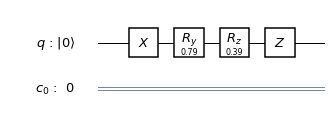

In [56]:
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q, c)
print("original")
stater(qc)
print("insert x gate")
qc.x(q)
stater(qc)
print("insert ry gate")
qc.ry(pi/4,q)
stater(qc)
print("insert rz gate")
qc.rz(pi/8,q)
stater(qc)
print("insert z gate")
qc.z(q)
stater(qc)
qc.draw(output='mpl')

In [57]:
meas = QuantumCircuit(q,c)
meas.measure(q, c)

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = qc+meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'0': 142, '1': 858}


In [58]:
# from https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/002-The_Weird_and_Wonderful_World_of_the_Qubit/005-The_Bloch_Sphere.html
meas_x = QuantumCircuit(q, c)
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []

for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u1(phase, q)
    circuits.append(qc + middle + meas_x)
    circuits.append(qc + middle + meas_y)
    circuits.append(qc + middle + meas_z)
    
job = execute(circuits,
              backend = Aer.get_backend('qasm_simulator'),
              shots=1024)
result = job.result()

for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1

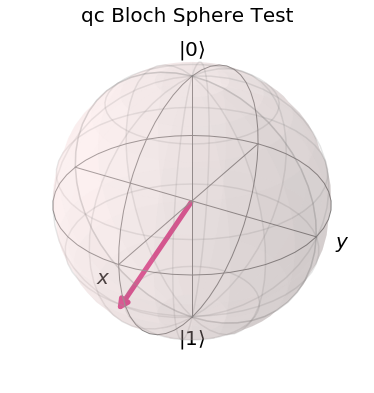

In [59]:
plot_bloch_vector(bloch, title='qc Bloch Sphere Test')
#this graph is the result of the qc circuit of one qubit

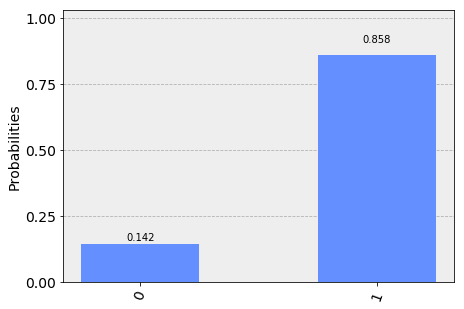

In [60]:
plot_histogram(counts)